# __Plotting__
Purpose:  Investigation of (price and patent) data to determine points of interest

In [1]:
import pandas as pd
import dill
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Updated with new post-merge dataset!

# Unpickle Price_Patent_Data from the 'MergingAllData' Jupyter Notebook
Price_Patent_Data = dill.load(open('data/Price_Patent_Data.pkd', 'rb'))

In [ ]:
Price_Patent_Data.info()

In [3]:
#Convert all to datetimes
Price_Patent_Data['effective_date'] = pd.to_datetime(Price_Patent_Data['effective_date']) #, format='%Y/%m/%d')
Price_Patent_Data['as_of_date'] = pd.to_datetime(Price_Patent_Data['as_of_date']) #, format='%Y/%m/%d')
Price_Patent_Data['corresponding_generic_drug_effective_date'] = pd.to_datetime(Price_Patent_Data['corresponding_generic_drug_effective_date']) #, format='%Y/%m/%d')
Price_Patent_Data['approval_date'] = pd.to_datetime(Price_Patent_Data['approval_date']) #, format='%Y/%m/%d')
Price_Patent_Data['patent_expire_date_text'] = pd.to_datetime(Price_Patent_Data['patent_expire_date_text']) #, format='%Y/%m/%d')
Price_Patent_Data['submission_date'] = pd.to_datetime(Price_Patent_Data['submission_date']) #, format='%Y/%m/%d')
Price_Patent_Data['exclusivity_date'] = pd.to_datetime(Price_Patent_Data['exclusivity_date']) #, format='%Y/%m/%d')

In [4]:
Price_Patent_Data.reset_index(inplace = True)

In [71]:
# Group drugs by name and sort values by price (highest to lowest)
price_table = Price_Patent_Data.groupby('ndc_description').mean().sort_values(by='nadac_per_unit', ascending = False)
price_table.head(10)

,corresponding_generic_drug_nadac_per_unit,nadac_per_unit,ndc,appl_no,product_no
ndc_description,,,,,
STELARA 90MG/ML SYRINGE,NaN,19777.124734,5.789401e+10,NaN,NaN
STELARA 45MG/0.5ML SYRINGE,NaN,19547.656830,5.789401e+10,NaN,NaN
NEULASTA 6MG/0.6ML SYRINGE,NaN,9766.230475,5.551302e+10,NaN,NaN
SIMPONI 50MG/0.5ML PEN INJEC,NaN,8645.892518,5.789401e+10,NaN,NaN
SIMPONI 50MG/0.5ML SYRINGE,NaN,8640.528122,5.789401e+10,NaN,NaN
AVONEX PREFILLED SYR 30MCG KIT,NaN,6364.954095,5.962702e+10,NaN,NaN
AVONEX PEN 30MCG/0.5ML KIT,NaN,6348.271372,5.962703e+10,NaN,NaN
LUPRON DEPOT 22.5MG 3MO KIT,NaN,4214.608311,7.433460e+07,NaN,NaN
CIMZIA 200MG/ML SYRINGE KIT,NaN,3889.861408,5.047407e+10,NaN,NaN


In [72]:
# Group drugs by name and sort values by the price of the corresponding generic drug (highest to lowest)
price_table = Price_Patent_Data[Price_Patent_Data['classification_for_rate_setting']=='G'].groupby(Price_Patent_Data['ndc_description'])
# price_table = price_table.sort_values('nadac_per_unit', ascending = False)
price_table.head(10)

,patent_names,as_of_date,classification_for_rate_setting,corresponding_generic_drug_effective_date,corresponding_generic_drug_nadac_per_unit,effective_date,explanation_code,nadac_per_unit,ndc,ndc_description,...,drug_substance_flag,drug_product_flag,patent_use_code,delist_flag,submission_date,appl_type,exclusivity_code,exclusivity_date,dosage_form,route
0,,2019-09-18,G,NaT,NaN,2019-09-18,1,0.31284,1.130055e+08,12-HR DECONGEST 120MG CAPLET,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1,,2019-09-18,G,NaT,NaN,2019-09-18,1,0.31284,3.680001e+10,12-HR DECONGEST 120MG CAPLET,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
2,,2019-09-18,G,NaT,NaN,2019-09-18,1,0.31284,3.680001e+10,12-HR DECONGEST 120MG CAPLET,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
3,,2019-09-18,G,NaT,NaN,2019-09-18,1,0.31284,2.438501e+10,12HR NASAL DECONGEST ER 120MG,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
4,,2019-09-18,G,NaT,NaN,2019-09-18,1,0.31284,7.000002e+10,12HR NASAL DECONGEST ER 120MG,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
5,,2019-09-18,G,NaT,NaN,2019-09-18,"1, 5",0.73747,4.612204e+10,24H NASAL ALLERGY 55MCG SPRAY,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
6,,2019-09-18,G,NaT,NaN,2019-09-18,1,0.17906,7.000004e+10,24HR ALLERGY(LEVOCETIRZN) 5MG,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
7,,2019-09-18,G,NaT,NaN,2019-09-18,1,0.17906,7.000004e+10,24HR ALLERGY(LEVOCETIRZN) 5MG,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
8,,2019-09-18,G,NaT,NaN,2019-09-18,"1, 5, 6",0.31524,5.167221e+10,3-DAY VAGINAL CREAM,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
9,,2019-09-18,G,NaT,NaN,2019-09-18,1,0.06089,4.612201e+10,8 HOUR ER 650MG CAPLET,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


In [73]:
Price_Patent_Data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12853068 entries, 0 to 12853067
Data columns (total 40 columns):
patent_names                                 12853000 non-null object
as_of_date                                   12798280 non-null datetime64[ns]
classification_for_rate_setting              12798280 non-null object
corresponding_generic_drug_effective_date    150672 non-null datetime64[ns]
corresponding_generic_drug_nadac_per_unit    150672 non-null float64
effective_date                               12798280 non-null datetime64[ns]
explanation_code                             12798280 non-null object
nadac_per_unit                               12798280 non-null float64
ndc                                          12798280 non-null float64
ndc_description                              12798280 non-null object
otc                                          12798280 non-null object
pharmacy_type_indicator                      12798280 non-null object
pricing_unit          

In [74]:
# Top 15 drugs (brand and generic) by frequency in the dataset
top_drugs_by_freq = Price_Patent_Data['ndc_description'].value_counts().sort_values(ascending = False)
top_15_drugs_by_freq = top_drugs_by_freq[:15].index.tolist()
top_15_drugs_by_freq

['IBUPROFEN 200MG TABLET',
 'LEVETIRACETAM 500MG TABLET',
 'LEVETIRACETAM 750MG TABLET',
 'HYDROCHLOROTHIAZIDE 50MG TAB',
 'LAMOTRIGINE 25MG TABLET',
 'METRONIDAZOLE 250MG TABLET',
 'ALPRAZOLAM 0.5MG TABLET',
 'GABAPENTIN 600MG TABLET',
 'METRONIDAZOLE 500MG TABLET',
 'LISINOPRIL 20MG TABLET',
 'GABAPENTIN 800MG TABLET',
 'LISINOPRIL 10MG TABLET',
 'LAMOTRIGINE 100MG TABLET',
 'IBUPROFEN 600MG TABLET',
 'LAMOTRIGINE 200MG TABLET']

In [75]:
# Top 15 generic drugs by frequency in the dataset
top_drugs_by_freq = Price_Patent_Data[Price_Patent_Data['classification_for_rate_setting']=='G']
top_generic_drugs_by_freq = top_drugs_by_freq['ndc_description'].value_counts().sort_values(ascending = False)
top_15_drugs_generic = top_generic_drugs_by_freq[:15].index.tolist()
top_15_drugs_generic

['IBUPROFEN 200MG TABLET',
 'LEVETIRACETAM 500MG TABLET',
 'LEVETIRACETAM 750MG TABLET',
 'HYDROCHLOROTHIAZIDE 50MG TAB',
 'LAMOTRIGINE 25MG TABLET',
 'METRONIDAZOLE 250MG TABLET',
 'ALPRAZOLAM 0.5MG TABLET',
 'GABAPENTIN 600MG TABLET',
 'METRONIDAZOLE 500MG TABLET',
 'LISINOPRIL 20MG TABLET',
 'GABAPENTIN 800MG TABLET',
 'LISINOPRIL 10MG TABLET',
 'LAMOTRIGINE 100MG TABLET',
 'IBUPROFEN 600MG TABLET',
 'LAMOTRIGINE 200MG TABLET']

In [76]:
# Are the top 15 drugs by frequency all generics?
top_15_drugs_by_freq == top_15_drugs_generic

True

In [77]:
# Top 15 brand-name drugs by frequency in the dataset
top_brand_drugs_by_freq = Price_Patent_Data[Price_Patent_Data['classification_for_rate_setting']=='B']
top_brand_drugs_sorted = top_brand_drugs_by_freq['ndc_description'].value_counts().sort_values(ascending = False)
top_15_drugs_brand = top_brand_drugs_sorted[:15].index.tolist()
top_15_drugs_brand

['GLYXAMBI 10MG-5MG TABLET',
 'GLYXAMBI 25MG-5MG TABLET',
 'EPCLUSA 400MG-100MG TABLET',
 'HYSINGLA ER 60MG TABLET',
 'HYSINGLA ER 20MG TABLET',
 'HYSINGLA ER 30MG TABLET',
 'HYSINGLA ER 40MG TABLET',
 'HYSINGLA ER 80MG TABLET',
 'DALIRESP 500MCG TABLET',
 'INTELENCE 200MG TABLET',
 'INTELENCE 100MG TABLET',
 'JENTADUETO 2.5MG-500MG TAB',
 'JENTADUETO 2.5MG-850MG TAB',
 'ENTRESTO 24MG-26MG TABLET',
 'ENTRESTO 49MG-51MG TABLET']

Text(0.5, 1.0, 'Top 15 generic drugs (by frequency) prices over time')

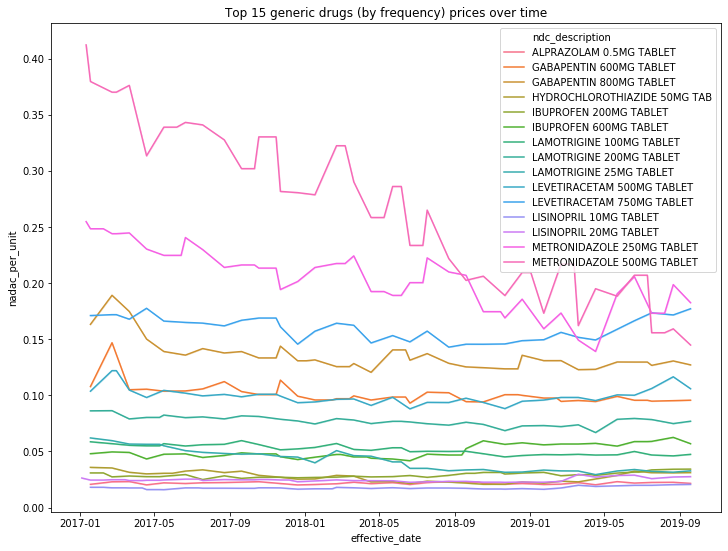

In [86]:
# Plot prices for the top 15 generic drugs over time
top_15_df = Price_Patent_Data[Price_Patent_Data['ndc_description'].isin(top_15_drugs_generic)]

fig = plt.figure(figsize = (12, 9))
sns.lineplot(x = 'effective_date', 
             y = 'nadac_per_unit',
             hue = 'ndc_description',
             data = top_15_df).set_title('Top 15 generic drugs (by frequency) prices over time')

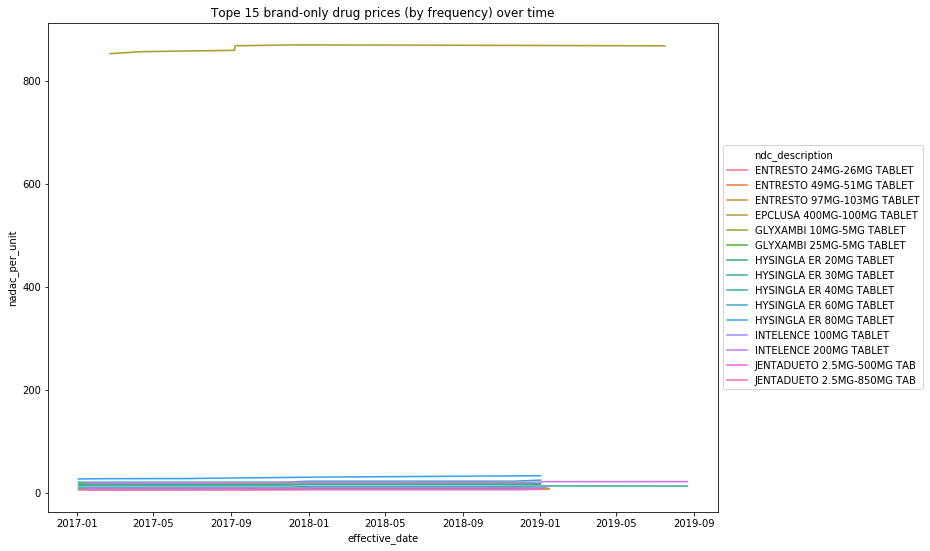

In [85]:
# Top 15 brand-name drugs without generic equivalents by frequency in the dataset
brand_drugs_by_freq = Price_Patent_Data[(Price_Patent_Data['classification_for_rate_setting']=='B')]
brand_drugs_no_te = brand_drugs_by_freq[brand_drugs_by_freq['te_code'].isnull()] # Roughly: brand drugs with no therapeutic equivalents


sorted_brand_only_drugs = brand_drugs_no_te['ndc_description'].value_counts().sort_values(ascending = False)
top_15_brand_only_drugs = sorted_brand_only_drugs[:15].index.tolist()

# # Plot prices for the top 15 brand-name drugs over time
top_15_brand_only_drugs_no_te = Price_Patent_Data[Price_Patent_Data['ndc_description'].isin(top_15_brand_only_drugs)]

fig = plt.figure(figsize = (12, 9))
sns.lineplot(x = 'effective_date', 
             y = 'nadac_per_unit',
             hue = 'ndc_description',
             data = top_15_brand_only_drugs_no_te).set_title('Tope 15 brand-only drug prices (by frequency) over time')
# plt.title()
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol=1)

-------------------------------------------
We'll drop Epclusa (for the purpose of these plots) since, with respect to price, it's an outlier.  We'll also see that it'll allow us to see the other drug price trends more accurately.

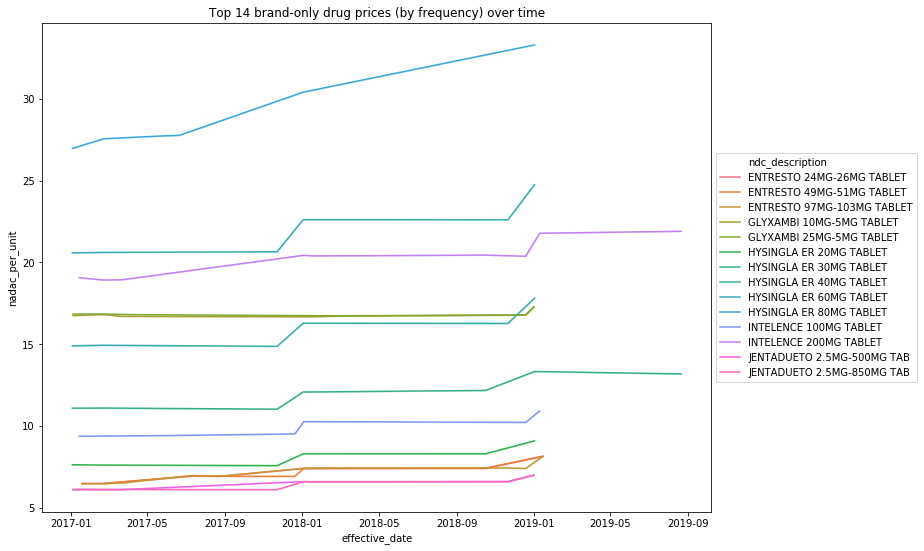

In [87]:
# Plot prices for the top 14 (EPCLUSA excluded as an outlier) brand-name drugs over time
top_14_brand_only_drugs = top_15_brand_only_drugs_no_te[~top_15_brand_only_drugs_no_te['ndc_description'].str.contains('EPCLUSA')]

fig = plt.figure(figsize = (12, 9))
g = sns.lineplot(x = 'effective_date', 
             y = 'nadac_per_unit',
             hue = 'ndc_description',
             data = top_14_brand_only_drugs).set_title('Top 14 brand-only drug prices (by frequency) over time')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol=1)

### __Patent data over time__

AttributeError: 'PathCollection' object has no attribute 'set_title'

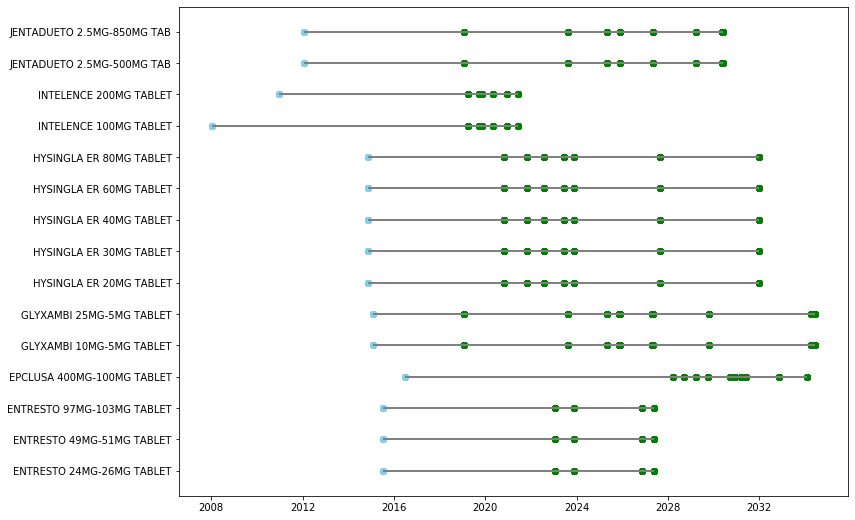

In [90]:
# Plot Patent approval dates, followed by expiry dates on a horizontal lollipop plot.  
# I believe that the green dots all represent extensions to that particular drug

fig = plt.figure(figsize=(12, 9))

plt.hlines(y=top_15_brand_only_drugs_no_te['ndc_description'], 
           xmin=top_15_brand_only_drugs_no_te['approval_date'], 
           xmax=top_15_brand_only_drugs_no_te['patent_expire_date_text'], 
           color='grey', 
           alpha=0.4)
plt.scatter(top_15_brand_only_drugs_no_te['approval_date'], 
            top_15_brand_only_drugs_no_te['ndc_description'], 
            color = 'skyblue', 
            alpha = 1, 
            label = 'approval_date')
plt.scatter(top_15_brand_only_drugs_no_te['patent_expire_date_text'],
            top_15_brand_only_drugs_no_te['ndc_description'],
            color = 'green',
            alpha = 0.4, 
            label = 'patent_expire_date')
plt.set_title('Patent approval and expiry dates of top 15 drugs (by frequency) over time')
plt.legend(loc = 'lower right')

### __Brand Drugs in Dataset__

In [5]:
Price_Patent_Data['classification_for_rate_setting'].value_counts()

G         12354268
B           431208
B-ANDA       12804
Name: classification_for_rate_setting, dtype: int64

### __Drugs without Therapeutic Equivalents__

In [92]:
top_15_brand_only_drugs

['GLYXAMBI 10MG-5MG TABLET',
 'GLYXAMBI 25MG-5MG TABLET',
 'EPCLUSA 400MG-100MG TABLET',
 'HYSINGLA ER 60MG TABLET',
 'HYSINGLA ER 40MG TABLET',
 'HYSINGLA ER 20MG TABLET',
 'HYSINGLA ER 30MG TABLET',
 'HYSINGLA ER 80MG TABLET',
 'INTELENCE 200MG TABLET',
 'INTELENCE 100MG TABLET',
 'JENTADUETO 2.5MG-500MG TAB',
 'JENTADUETO 2.5MG-850MG TAB',
 'ENTRESTO 24MG-26MG TABLET',
 'ENTRESTO 49MG-51MG TABLET',
 'ENTRESTO 97MG-103MG TABLET']

In [93]:
#Order Drugs by highest price
#top_brand_drugs_by_freq ==> a variable created further up in the workflow
top_brand_only_drugs = top_brand_drugs_by_freq[top_brand_drugs_by_freq['te_code'].isnull()] #with no therapeutic equivalents
drugs_by_price = top_brand_only_drugs.sort_values(by='nadac_per_unit', ascending = False) #sort all values by price

In [94]:
# Aggregate drugs on list by top 15 drug names
drugs_by_price_grouped = drugs_by_price.groupby('ndc_description')
drugs_by_price_grouped.apply(lambda drugs_by_price_grouped: drugs_by_price_grouped.sort_values(by = ['nadac_per_unit'], ascending = False)) #sort first by price, then get the top 15
drugs_by_price_grouped = drugs_by_price_grouped.head(15)
drugs_by_price_grouped = drugs_by_price_grouped['ndc_description'] # Select just the names that have been ordered by price
drugs_by_price_grouped = drugs_by_price_grouped.unique()[:15] #get unique names from the list

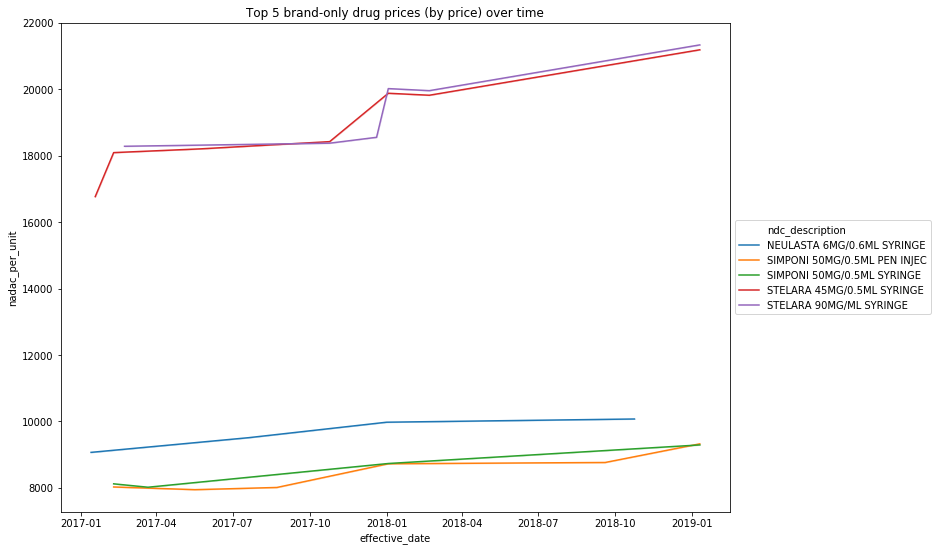

In [107]:
# Plot prices for the top 5 brand-name drugs over time (use list to filter) - the top 5 are much higher than the rest
highest_price_15_brand_only_drugs = Price_Patent_Data[Price_Patent_Data['ndc_description'].isin(drugs_by_price_grouped[:5])]

fig = plt.figure(figsize = (12, 9))
sns.lineplot(x = 'effective_date', 
             y = 'nadac_per_unit',
             hue = 'ndc_description',
             data = highest_price_15_brand_only_drugs).set_title('Top 5 brand-only drug prices (by price) over time')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol=1)


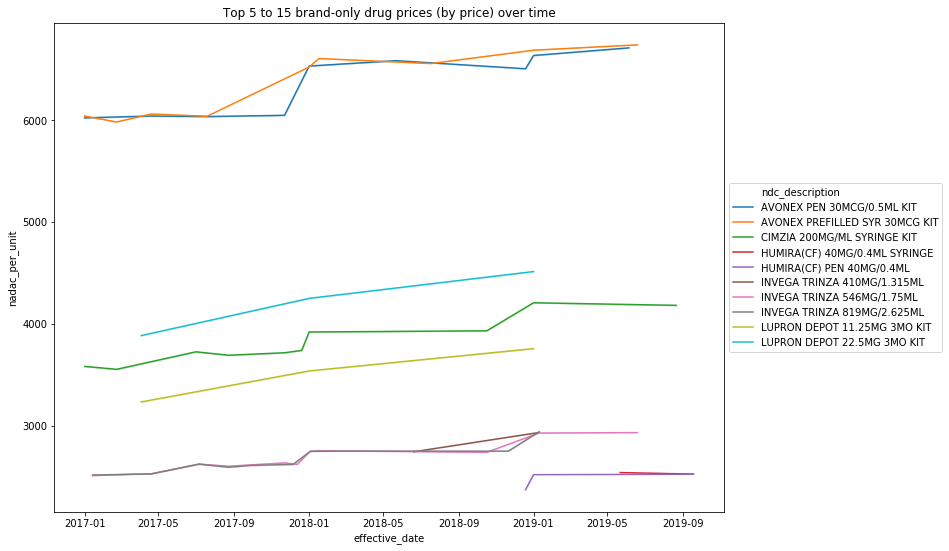

In [108]:
# Plot prices for the top 5-15 brand-name drugs over time (use list to filter)
highest_price_15_brand_only_drugs = Price_Patent_Data[Price_Patent_Data['ndc_description'].isin(drugs_by_price_grouped[5:])]

fig = plt.figure(figsize = (12, 9))
sns.lineplot(x = 'effective_date', 
             y = 'nadac_per_unit',
             hue = 'ndc_description',
             data = highest_price_15_brand_only_drugs).set_title('Top 5 to 15 brand-only drug prices (by price) over time')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol=1)


In [6]:
###  TO DO:  Plot brands with generic equivalent on top of generic approval date
Price_Patent_Data.classification_for_rate_setting.value_counts()

G         12354268
B           431208
B-ANDA       12804
Name: classification_for_rate_setting, dtype: int64

In [110]:
# Look at brand drugs with therapeutic equivalents
# consider looking specifically at these drugs when regressing for price

all_drugs_with_te = Price_Patent_Data[Price_Patent_Data['classification_for_rate_setting'].str.contains('B', na=False)] #filter for brand only drugs

brand_drugs_with_te = all_drugs_with_te[all_drugs_with_te['te_code'].notnull()] #with therapeutic equivalents
brand_drugs_with_te = brand_drugs_with_te.groupby('ndc_description')
brand_drugs_with_te.apply(lambda brand_drugs_with_te: brand_drugs_with_te.sort_values(by=['nadac_per_unit'], ascending = False)) #sort all values by price

brand_drugs_with_te = brand_drugs_with_te['ndc_description'].unique()[:15].index.to_list() #convert the top 15 unique elements to a list
brand_drugs_with_te

['AGGRENOX 25MG-200MG CAPSULE',
 'AMBIEN CR 12.5MG TABLET',
 'AZULFIDINE ENTAB 500MG',
 'BARACLUDE 0.5MG TABLET',
 'BENICAR HCT 20-12.5MG TABLET',
 'BENICAR HCT 40-12.5MG TABLET',
 'CARDIZEM LA 120MG TABLET',
 'CELLCEPT 200MG/ML ORAL SUSP',
 'DALIRESP 500MCG TABLET',
 'DILAUDID 5MG/5ML ORAL LIQUID',
 'DIOVAN HCT 160-12.5MG TAB',
 'DIOVAN HCT 320-12.5MG TAB',
 'EXFORGE HCT 10-160-12.5MG TAB',
 'GLUCOTROL XL 10MG TABLET',
 'GLUCOTROL XL 5MG TABLET']

NameError: name 'ylim' is not defined

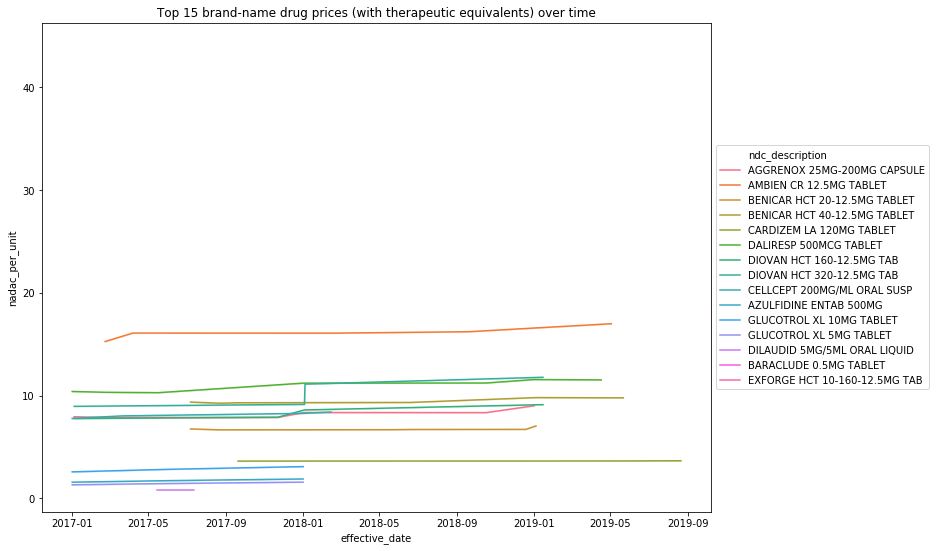

In [117]:
# Plot prices for the top 5:15 brand-name drugs over time (use list to filter)
highest_price_15_drugs_with_te = Price_Patent_Data[Price_Patent_Data['ndc_description'].isin(brand_drugs_with_te)]

fig = plt.figure(figsize = (12, 9))
g = sns.lineplot(x = 'effective_date', 
             y = 'nadac_per_unit',
             hue = 'ndc_description',
             data = highest_price_15_drugs_with_te).set_title('Top 15 brand-name drug prices (with therapeutic equivalents) over time')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol=1)
g.set(ylim(0, 20))

In [ ]:
# Create a correlation (heatmap) plot
import numpy as np

#Binarizing variables first would allow a comparison of more variables, however, I get a memory error if I try pd.get_dummies()

corr = Price_Patent_Data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(240, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0, square = True,  linewidths = 0.5, cbar_kws = {'shrink': 0.5})

## __Original Plots__

Plots pre-TDI

### __Ibuprofen Prices over Time__
In this case:
* time == effective_date
* price == nadac_per_unit

(array([735964., 736146., 736330., 736511., 736695., 736876., 737060.,
        737241., 737425.]), <a list of 9 Text xticklabel objects>)

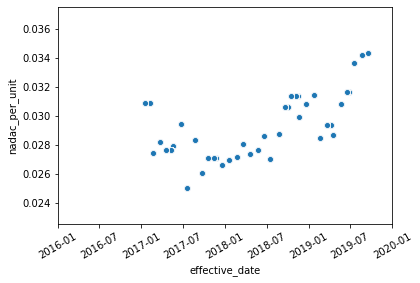

In [119]:
# Create a dataframe for Ibuprofen 200mg tablets
ibuprofen_200mg_tab = Price_Patent_Data[Price_Patent_Data['ndc_description']=='IBUPROFEN 200MG TABLET']
g = sns.scatterplot(x = ibuprofen_200mg_tab['effective_date'], y = ibuprofen_200mg_tab['nadac_per_unit'])
plt.xlim('01/01/2016','01/01/2020')
plt.ylim(0.0225, 0.0375)
plt.xticks(rotation = 30)

### __Ibuprofen Prices v. 'as_of_date'__
This column is not in the data dictionary, but I believe it's a date corresponding to prices that's updated maybe more frequenly than the effective_date?

(array([735964., 736146., 736330., 736511., 736695., 736876., 737060.,
        737241., 737425.]), <a list of 9 Text xticklabel objects>)

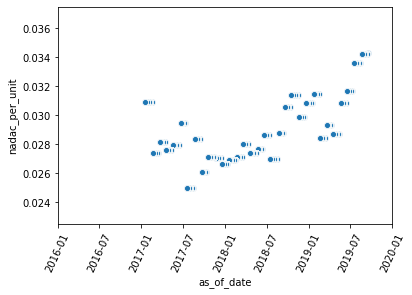

In [120]:
g = sns.scatterplot(x = ibuprofen_200mg_tab['as_of_date'], y = ibuprofen_200mg_tab['nadac_per_unit'])
plt.xlim('01/01/2016','01/01/2020')
plt.ylim(0.0225, 0.0375)
plt.xticks(rotation=65)

### __Prices for all Ibuprofen in Dataset v. Time__

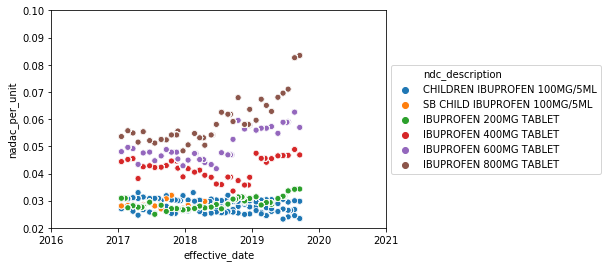

In [121]:
ibuprofen_all = Price_Patent_Data[Price_Patent_Data['ingredient'].str.contains('IBUPROFEN', na=False)]
g = sns.scatterplot(x = 'effective_date', y = 'nadac_per_unit', hue = ibuprofen_all.ndc_description, data = ibuprofen_all)
# plt.xlim('01/01/2014','01/01/2020')
plt.ylim(0.02, 0.1)
plt.xlim('2016-01-01', '2021-01-01')
g.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol=1)


### __Cost of Metformin v. Time__

Multiple varieties of metformin displayed here

(734869.0, 737425.0)

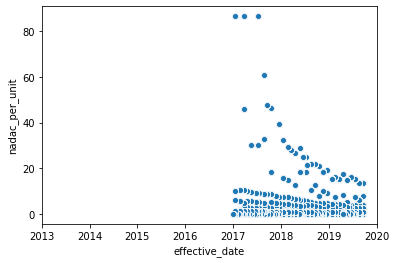

In [122]:
metformin = Price_Patent_Data[Price_Patent_Data['ndc_description'].str.contains('METFORMIN', na = False)]
g = sns.scatterplot(x = metformin['effective_date'], y = metformin['nadac_per_unit'])
plt.xlim('01/01/2013','01/01/2020')

In [123]:
# Varieties of metformin in dataset
metformin['ndc_description'].value_counts()

METFORMIN HCL 500MG TABLET                 9827
METFORMIN HCL 1,000MG TABLET               8726
METFORMIN HCL 850MG TABLET                 7932
METFORMIN HCL ER 500MG TABLET              4096
METFORMIN HCL ER 750MG TABLET              1932
PIOGLITAZONE-METFORMIN 15-500              1731
PIOGLITAZONE-METFORMIN 15-850              1546
GLYBURIDE-METFORMIN 5-500MG                1529
GLYBURIDE-METFORMIN 2.5-500MG              1446
GLYBURID-METFORMIN 1.25-250MG               951
METFORMIN ER 1,000MG OSM-TAB                639
GLIPIZIDE-METFORMIN 2.5-500MG               564
GLIPIZIDE-METFORMIN 2.5-250MG               560
GLIPIZIDE-METFORMIN 5-500MG                 560
METFORMIN HCL ER 500MG OSM-TB               302
METFORMIN HCL ER 1,000MG TAB                268
METFORMIN ER 500MG OSMOTIC TB               227
METFORMIN ER 500MG GASTRC-TB                192
METFORMIN ER 1,000MG GASTR-TB               180
GLYBURIDE-METFORMIN 1.25MG-250MG TABLET     132
ALOGLIPTIN-METFORMIN 12.5-1000          

### __Price of Lisinopril over Time__
Multiple varieties of lisinopril displayed here

In [7]:
Price_Patent_Data = Price_Patent_Data[Price_Patent_Data['ndc_description'].notnull()]
Price_Patent_Data['ndc_description'].isnull().value_counts(dropna = False)

False    12798280
Name: ndc_description, dtype: int64

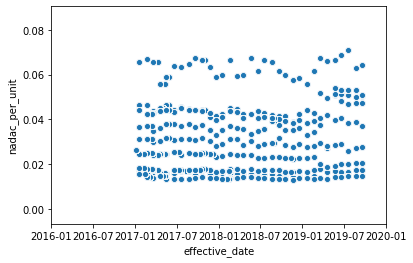

In [10]:
lisinopril = Price_Patent_Data[Price_Patent_Data['ndc_description'].str.contains('LISINOPRIL')]
g = sns.scatterplot(x = lisinopril['effective_date'], y = lisinopril['nadac_per_unit']).set(xlim=('01/01/2016','01/01/2020'))

### __Price of Prinivil over Time__
Multiple varieties of prinivil displayed here

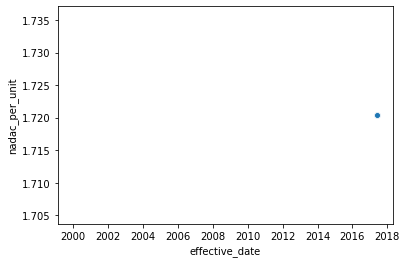

In [11]:
prinivil = Price_Patent_Data[Price_Patent_Data['ndc_description'].str.contains('PRINIVIL')]
g = sns.scatterplot(x = prinivil['effective_date'], y = prinivil['nadac_per_unit'])

### __Price of Simvastatin over Time__
Multiple varieties of simvastatin displayed here

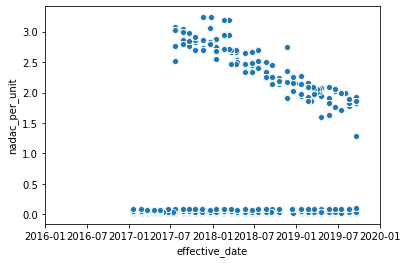

In [14]:
simvastatin  = Price_Patent_Data[Price_Patent_Data['ndc_description'].str.contains('SIMVASTATIN')]
g = sns.scatterplot(x = simvastatin['effective_date'], y = simvastatin['nadac_per_unit']).set(xlim=('01/01/2016','01/01/2020'))

In [17]:
#Observations in dataset for 'SIMVASTATIN'
Price_Patent_Data['ndc_description'].str.contains('SIMVASTATIN').value_counts(dropna = False)

False    12772324
True        25956
Name: ndc_description, dtype: int64

### __Price of Zocor over Time__
Multiple varieties of zocor displayed here

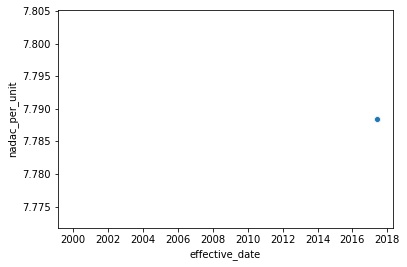

In [13]:
zocor  = Price_Patent_Data[Price_Patent_Data['ndc_description'].str.contains('ZOCOR')]
g = sns.scatterplot(x = zocor['effective_date'], y = zocor['nadac_per_unit'])

In [16]:
#Observations in dataset for 'ZOCOR'
Price_Patent_Data['ndc_description'].str.contains('ZOCOR').value_counts(dropna = False)

False    12798174
True          106
Name: ndc_description, dtype: int64

### __Price of Ambien over Time__
Multiple varieties of ambien displayed here

[(735964.0, 737425.0)]

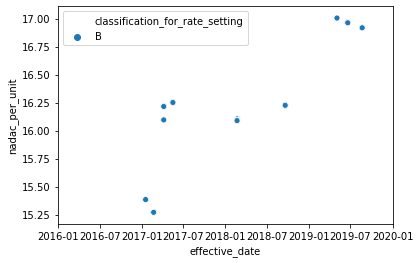

In [20]:
# Price of Ambien over time (no generic equivalent)
ambien  = Price_Patent_Data[Price_Patent_Data['ndc_description'].str.contains('AMBIEN')]
sns.scatterplot(x = ambien['effective_date'], y = ambien['nadac_per_unit'], hue = ambien['classification_for_rate_setting']).set(xlim=('01/01/2016','01/01/2020'))

(735234.0, 737425.0)

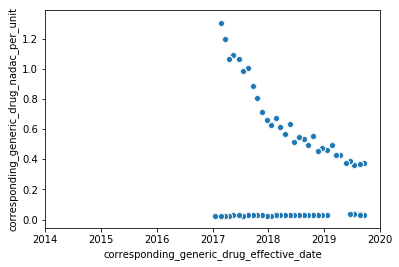

In [21]:
sns.scatterplot(x = ambien['corresponding_generic_drug_effective_date'], y = ambien['corresponding_generic_drug_nadac_per_unit'])
plt.xlim('01/01/2014','01/01/2020')

In [23]:
brands_with_generics = Price_Patent_Data[Price_Patent_Data['corresponding_generic_drug_nadac_per_unit'].notnull()]
brands_with_generics.head()

,patent_names,as_of_date,classification_for_rate_setting,corresponding_generic_drug_effective_date,corresponding_generic_drug_nadac_per_unit,effective_date,explanation_code,nadac_per_unit,ndc,ndc_description,...,drug_substance_flag,drug_product_flag,patent_use_code,delist_flag,submission_date,appl_type,exclusivity_code,exclusivity_date,dosage_form,route
33,,2019-09-18,B,2019-09-18,0.29365,2018-12-19,2,28.61513,5.914800e+10,ABILIFY 10MG TABLET,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
34,,2019-09-18,B,2019-09-18,0.30030,2018-12-19,2,28.54963,5.914800e+10,ABILIFY 15MG TABLET,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
35,,2019-09-18,B,2019-09-18,0.47617,2019-01-23,4,40.56021,5.914800e+10,ABILIFY 20MG TABLET,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
36,,2019-09-18,B,2019-09-18,0.27088,2019-03-20,4,28.63227,5.914800e+10,ABILIFY 2MG TABLET,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
37,,2019-09-18,B,2019-09-18,0.41039,2019-07-17,4,40.69304,5.914800e+10,ABILIFY 30MG TABLET,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


In [24]:
brands_with_generics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150672 entries, 33 to 12798257
Data columns (total 40 columns):
patent_names                                 150672 non-null object
as_of_date                                   150672 non-null datetime64[ns]
classification_for_rate_setting              150672 non-null object
corresponding_generic_drug_effective_date    150672 non-null datetime64[ns]
corresponding_generic_drug_nadac_per_unit    150672 non-null float64
effective_date                               150672 non-null datetime64[ns]
explanation_code                             150672 non-null object
nadac_per_unit                               150672 non-null float64
ndc                                          150672 non-null float64
ndc_description                              150672 non-null object
otc                                          150672 non-null object
pharmacy_type_indicator                      150672 non-null object
pricing_unit                               

## __Brands with Generics__

### __Nicorette__

C:\Users\The Fat Lady\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


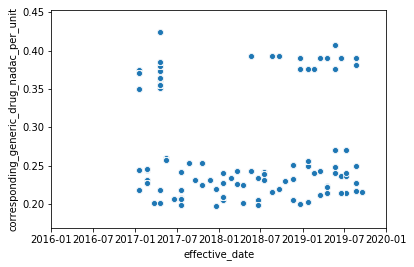

In [28]:
#We see a very clear clustering here.  Look at labeling these drugs with different colors and a legend to better tell what's going on.
brands_with_generics_nicorette = brands_with_generics[Price_Patent_Data['ndc_description'].str.contains('NICORETTE')]
g = sns.scatterplot(x = brands_with_generics_nicorette['effective_date'], y = brands_with_generics_nicorette['corresponding_generic_drug_nadac_per_unit']).set(xlim=('01/01/2016','01/01/2020'))

#### __Ambien__

(735969.0, 737425.0)

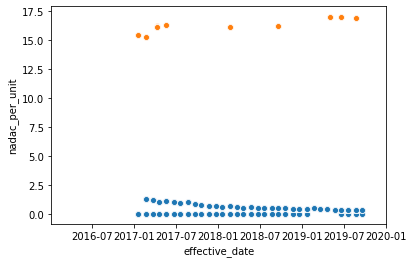

In [34]:
ambien  = Price_Patent_Data[Price_Patent_Data['ndc_description'].str.contains('AMBIEN')]
sns.scatterplot(x = ambien['corresponding_generic_drug_effective_date'], y = ambien['corresponding_generic_drug_nadac_per_unit'])
sns.scatterplot(x = ambien['effective_date'], y = ambien['nadac_per_unit'])
plt.xlim('01/06/2016','01/01/2020')

In [36]:
# Looking at more generic vs. brands
ambien_generic = Price_Patent_Data[Price_Patent_Data['ndc_description'].str.contains('ZOLPIDEM')]
ambien_generic['ndc_description'].value_counts()

ZOLPIDEM TARTRATE 10MG TABLET    62685
ZOLPIDEM TARTRATE 5MG TABLET     59871
ZOLPIDEM TART ER 12.5MG TAB       1073
ZOLPIDEM TART ER 6.25MG TAB        951
ZOLPIDEM TART 3.5MG TABLET SL       30
Name: ndc_description, dtype: int64

In [37]:
ambien_brand = Price_Patent_Data[Price_Patent_Data['ndc_description'].str.contains('AMBIEN')]
ambien_brand['ndc_description'].value_counts()

AMBIEN CR 12.5MG TABLET    270
AMBIEN 10MG TABLET         129
AMBIEN 5MG TABLET            5
Name: ndc_description, dtype: int64

In [39]:
ambien_patent = ambien_brand[ambien_brand['approval_date'].notnull()]
ambien_patent['approval_date'].head()

3283729   2005-09-02
3283730   2005-09-02
3283731   2005-09-02
3283732   2005-09-02
3283733   2005-09-02
Name: approval_date, dtype: datetime64[ns]

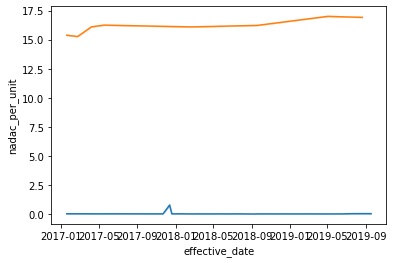

In [41]:
sns.lineplot(x = 'effective_date', y = 'nadac_per_unit', data = ambien_generic)
sns.lineplot(x = 'effective_date', y = 'nadac_per_unit', data = ambien_brand)